1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

C:\Users\pietr\AppData\Local\Temp\ipykernel_10608\2321032680.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


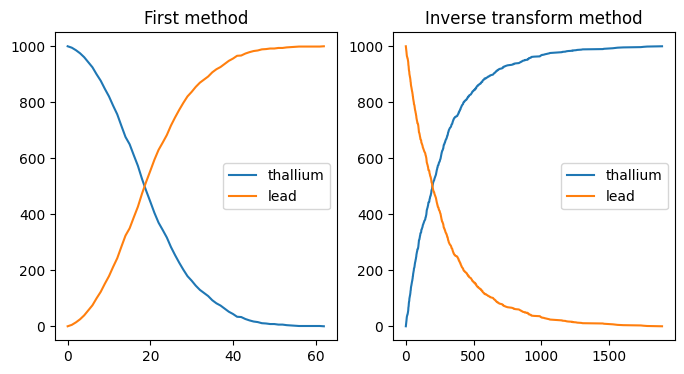

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t = 0
thallium_count = np.array([1000])
lead_count = np.array([0])
tau = 3.052 * 60

def prob(t,tau):
    return 1 - 2**(-t/tau)

while thallium_count[-1] != 0:
    t = t+1
    curr = 0
    for i in range(thallium_count[-1]):
        if (np.random.random() <= prob(t, tau)):
            curr = curr + 1
    
    thallium_count = np.append(thallium_count, np.max([thallium_count[-1]-curr,0]))
    lead_count = np.append(lead_count, lead_count[-1]+curr)





fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax1.plot(np.arange(t+1),thallium_count, label = 'thallium')
ax1.plot(np.arange(t+1),lead_count, label = 'lead')
ax1.legend(loc= 'best')
ax1.set_title('First method')


def icdf(x,tau):
    return -tau* np.log2(1-x)

dacay_times = np.sort(icdf(np.random.random(1000), tau))

ax2.plot(dacay_times,np.arange(1000), label = 'thallium')
ax2.plot(dacay_times,np.flip(np.arange(1000)), label = 'lead')
ax2.legend(loc= 'best')
ax2.set_title('Inverse transform method')

fig.show()


2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

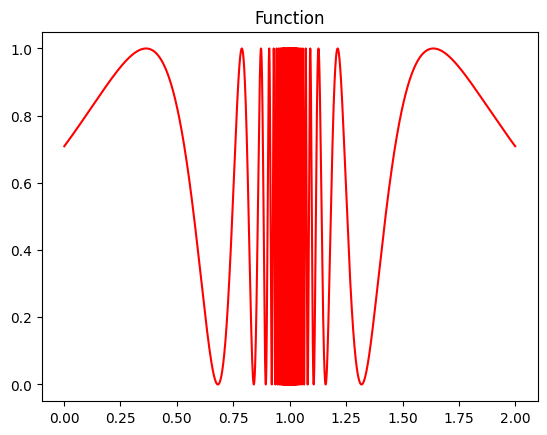

Results with hit/miss:
mean value:  1.347106
error:  0.00029841688357061806
Results with mean value method:
mean value:  1.3478916544270387
error:  0.02046490462728824


In [3]:
def f(x):
    return (np.sin(1. / (1-x)))**2

x=np.linspace(0.001, 1.999, 100000)
plt.plot(x, f(x), 'r-')
plt.title('Function')
plt.show()


N = 1000

# Hit/Miss

def MChm(f,N):
    count = 0
    
    for i in range(N):
        x = 2 * np.random.random()
        y = np.random.random()
        if y < f(x): count += 1
    I = 2 * count / N
    return I

integrals = np.array([])

for i in range(10000):
    integrals = np.append(integrals, MChm(f,N))

print('Results with hit/miss:')
print('mean value: ', np.mean(integrals))
print('error: ', np.std(integrals)/np.sqrt(10000))

# Mean value
a = 0
b = 2
N = 1000

def MCmv(f,N,a,b):
    x = (b-a)*np.random.random(N)
    I = (b-a)/N * np.sum(f(x))
    sig = (b-a)*np.std(f(x))/np.sqrt(N)
    return I, sig

res = MCmv(f,N,a,b)

print('Results with mean value method:')
print('mean value: ', res[0])
print('error: ', res[1])




3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [4]:
def f(X):
    if (np.sum(np.power(X,2))<=1):
        return 1
    return 0


def MCmv(f,N,d):
    x = (2*np.random.random((N,d)))-1
    I = (2**d)*np.sum([f(x[i,:]) for i in range(N)])/(N)
    return I


N = 100000
res2D = MCmv(f,N,2)
N = 10000000
res10D = MCmv(f,N,10)

print('Result with 2D:', res2D)
print('Result with 10D:', res10D)



Result with 2D: 3.138
Result with 10D: 2.5710592


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

Obtained inntegral: 0.838962190433044


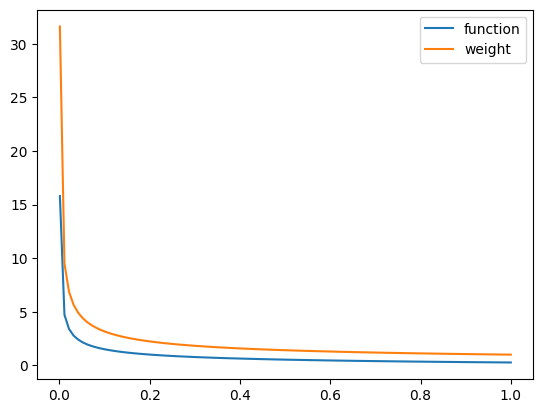

In [23]:
def f(x):
    return (x**(-0.5))/(np.e**x+1)

# def w(x):
#     return 1/(2*np.sqrt(x))

def w(x):
    return 1/(np.sqrt(x))

def icdfW(x):
    return (x**2)/4

    
# def icdfW(x):
#     return (x**2)

x = np.linspace(0.001, 1, 100)

plt.plot(x, f(x), label='function')
plt.plot(x, w(x), label='weight')


N = 10000000

x = np.random.random(N)

x = icdfW(x)*4
# without the moltiplication by 4 the samples would go only from 0 to 0.25; in this way we got samples distributed in [0,1]. Note that this operation actually changed the w(x) into 1/(2*sqrt(x))

# x = icdfW(x)


# integral_w = 1
integral_w = 2


I = (1/N)*np.sum(f(x)/w(x)) * integral_w

print('Obtained inntegral:', I)
plt.legend(loc='best')
plt.show()

#If we swap the commented lines with the correspondant ones we get the same result